# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

**Note on the short answer questions**: For the short answer questions please use your own words. The expectation is that you have not copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions [Suggested time: 20 minutes]

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Calculate the following probabilities and assign to the variables `ans1` and `ans2`, respectively, in the next cell:

1.a.1) $P(A and B)$
1.a.2) $P(A|B)$

Hint: draw a diagram!


In [2]:
ans1 = .7 * .5 
ans2 = (.4 * .7) / .5 

### b. Card Combinatorics

A standard deck of playing cards consists of 52 cards in each of the four suits of spades, hearts, diamonds, and clubs. Each suit contains 13 cards: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King.
    
You have a standard deck of 52 cards and are asked the following questions:

1.b.1) What is the probability of drawing a King or a Queen?

1.b.2) How many possible 5-card combinations can be formed with this deck of 52 cards?

Answer the questions below:

In [3]:
ans1 = 8 / 52
ans2 = 52*51*50*49*48 

### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (Jack, Queen, or King). 

The function `probability_of_scoring_k` is provided below. In this function, $k$ is the number of points won in the game, $n$ is the number of draws, and $p$ is the probability of winning a point. The function returns the corresponding probability of scoring $k$ points given $n$ and $p$.

In [4]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    
    # defining a helper function for factorial
    def fact(n):
        return np.math.factorial(n)
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

1.c.1) What is the probability $p$ of winning a point? 

In [6]:
# your code here 
p = 12/52

1.c.2) Use the function `probability_of_scoring_k` to compute the probability of scoring 8 points out out of 22 draws.

In [7]:
# your code here 
ans1 = probability_of_scoring_k(22, p, 8)
print(ans1)

0.06532117736042573


1.c.3) Use the function `probability_of_scoring_k` to calculate the probability of drawing $k$ points out of 22 draws, for $k$ ranging from 0 to 22. 

_Hint: Your final result should be in the form of a list or array._

In [24]:
# your code here
k_values = range(23)
probs = []
counts = []
for i, count in enumerate(k_values):
    prob = probability_of_scoring_k(22, p, i)
    probs.append(prob)
    counts.append(count + 1)

combo = list(zip(probs, counts))
combo

[(0.003113481211226729, 1),
 (0.020548975994096417, 2),
 (0.06472927438140372, 3),
 (0.12945854876280743, 4),
 (0.18447843198700062, 5),
 (0.1992367065459607, 6),
 (0.16935120056406663, 7),
 (0.1161265375296457, 8),
 (0.06532117736042573, 9),
 (0.03048321610153201, 10),
 (0.011888454279597485, 11),
 (0.0038907668551409957, 12),
 (0.001069960885163774, 13),
 (0.0002469140504224094, 14),
 (4.761913829575039e-05, 15),
 (7.619062127320063e-06, 16),
 (1.0000019042107584e-06, 17),
 (1.0588255456349209e-07, 18),
 (8.823546213624342e-09, 19),
 (5.57276602965748e-10, 20),
 (2.5077447133458666e-11, 21),
 (7.164984895273905e-13, 22),
 (9.770433948100781e-15, 23)]

1.c.4) Plot your results to create the probability mass function. Use a bar plot. What type of distribution does the `probability_of_scoring_k` have?

<BarContainer object of 23 artists>

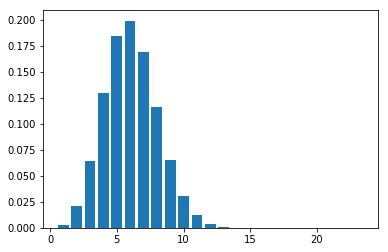

In [25]:
# your code here 
plt.bar(counts, probs)

This is normally distributed for discrete events. The most likely outcome is getting 6 points with a probability of about 20%. 


## Part 2: Statistical Distributions [Suggested time: 25 minutes]

### a. Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

2.a.1) Write a function to compute the z-scores for single checks of amount `check_amt`.

In [29]:
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    mu = 20 
    sigma = 2 
    x_bar = check_amt
    z = (x_bar - mu)/sigma
    p = 1 - stats.norm.cdf(z)
    return p, z 

2.a.2) I go to the TexMex restaurant and get a check for 24 dollars. 

Use your function to compute your check's z-score, and interpret the result using the empirical rule. 

In [30]:
# your code here 
z_score(24)

(0.02275013194817921, 2.0)

with a z-score of 2, this check is two standard deviations to the right of the population mean. 

2.a.3) Using $\alpha = 0.05$, is my 25 dollar check significantly **greater** than the mean? How do you know this?  

Hint: Here's a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [31]:
# your code here 
z_score(25)
 


(0.006209665325776159, 2.5)

this check sample has a z-score of 2.5 and a p=value of .0062, which means it is statistically significant and smaller than the limit of .025 (alpha / 2 for a two tail test). In other words, there is a .062% chance that this result is due to chance, so we can reject the null hypothesis.  


### b. Confidence Intervals and the Central Limit Theorem

2.b.1) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [36]:
# your code here 
def confidence_interval(mu, sigma):
    z_score = 1.96
    confidence = (z_score*sigma) + mu 
    interval = confidence - mu
    return confidence, (mu - interval)

In [37]:
confidence_interval(20, 2)

(23.92, 16.08)

In a normal distribution, 95% of values fall within 1.96 standard deviations of the population mean. In this Tex Mex restuarant, 95% of checks will be between 23.92 and 16.08 dollars. 

2.b.2) Imagine that we didn't know how the population of check totals was distributed. How would **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

We could take lots of samples to get a sampling distribution of the mean. According to the Central Limit Theorem, we would see that as samples increase, the sampling distribution of the means approximates a normal distribution if the population is normally distributed. Additionally, as the size of the sampling distribution increases, the standard error of the mean (the standard deviation of the sampling distribution) approaches 0, meaning if the distribution is normal, the sampling distribution mean gets closer and closer to the population mean, allowing us to get an estimate. 

## Part 3: Statistical Testing [Suggested time: 15 minutes]

The TexMex restaurant recently introduced Queso to its menu.

We have random samples of 1000 "No Queso" order check totals and 1000 "Queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

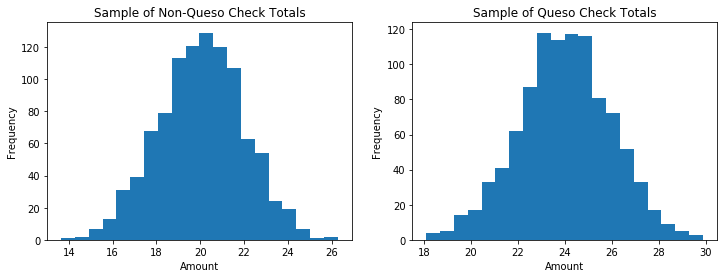

In [38]:
# Load the sample data 
no_queso = pickle.load(open("data/no_queso.pkl", "rb"))
queso = pickle.load(open("data/queso.pkl", "rb"))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### a. Hypotheses and Errors

The restaurant owners want to know if customers who order Queso spend **more or less** than customers who do not order Queso.

3.a.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.


Null hypothesis: customers who order queso do not spend more or less money than customers who do not order queso.
Alternative hypothesis: customers who order queso spend a statistically significant amount of money either more or less than customers who do not order queso. 

3.a.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In a type I error, we would reject the null hypothesis and assume that customers who order queso spend a significantly more or less amount than customers who do not order queso, when in reality there is no statistically significant difference and the null hypothesis is true. 

In a type II error, we fail to reject the null hypothesis when in reality, we should have; customers who order queso spend more or less than customers who do not. 


### b. Sample Testing

3.b.1) Run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance. Can you reject the null hypothesis? 

_Hint: Use `scipy.stats`._

In [59]:
stats.ttest_ind(no_queso, queso)

Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)

Given the t statistic of -45.17 and very small pvalue, we reject the null hypothesis. there is a statistically significant difference between queso and no_queso check size. 

## Part 4: Bayesian Statistics [Suggested time: 15 minutes]
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

4.a.1) What is the probability of Thomas getting a small puppy?
4.a.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
4.a.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4.a.4) For Part 2, what is the prior, posterior and likelihood?

In [45]:
ans1 = (.2 * .6) + (.8 * .1)
ans2 = (.55 * .8) / ((.2 * .1)+(.8*.55))
ans3 = "the pet store"
ans4_prior = "P(pet store)"
ans4_posterior = "P(pet store | large puppy)"
ans4_likelihood = "P(large puppy | pet store)"

In [48]:
(.1 * .8) / .2

0.4000000000000001

In [49]:
(.6 * .2) / .2

0.6

In [50]:
((.2 * .1)+(.8*.55))

0.4600000000000001